# LetsGrowMore Virtual Internship
## Data Science Internship Program (October 2021)
## Beginner Level Task:- Iris Flower Classification ML
### Author:- Pratik Borle 

# Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly seperable from the other 2, the latter are NOT linearly seperable from each other.

Attribute Information :- 

  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  class : - Iris setosa, Iris versicolor, Iris Virginica

### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import os 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
col_names=['SepalLengthcm','SepalWidthcm','PetalLengthcm','PetalWidthcm','Species']
df = pd.read_csv('D:\letsgrowmore\iris data\iris.data', names=col_names)
df.head()

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Display Stats of Data 

In [3]:
df.describe()

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Basic information about datatype 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthcm  150 non-null    float64
 1   SepalWidthcm   150 non-null    float64
 2   PetalLengthcm  150 non-null    float64
 3   PetalWidthcm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Display number of samples in each class  

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Preprocessing the dataset 

### Check for the null values 

In [6]:
df.isnull().sum()

SepalLengthcm    0
SepalWidthcm     0
PetalLengthcm    0
PetalWidthcm     0
Species          0
dtype: int64

### Exploratory Data Analysis  

##### Histogram

<AxesSubplot:>

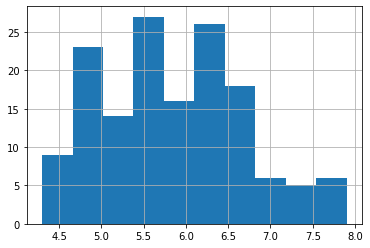

In [7]:
df['SepalLengthcm'].hist()

<AxesSubplot:>

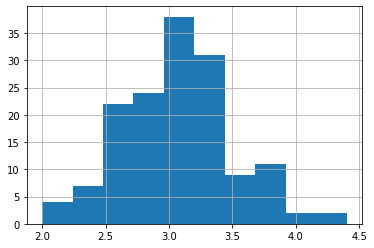

In [8]:
df['SepalWidthcm'].hist()

<AxesSubplot:>

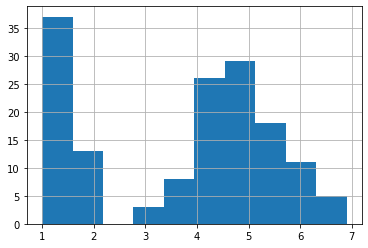

In [9]:
df['PetalLengthcm'].hist()

<AxesSubplot:>

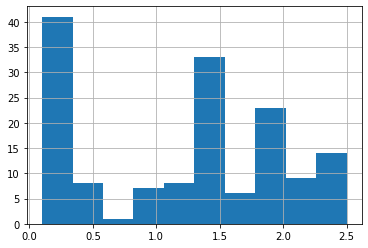

In [10]:
df['PetalWidthcm'].hist()

#### Scatter plot 

In [11]:
colors= ['maroon','orange','green']
species=['Iris-setosa','Iris-virginica','Iris-versicolor']

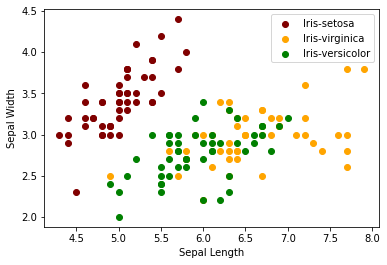

In [12]:
for i in range(3):
    x= df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthcm'], x['SepalWidthcm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

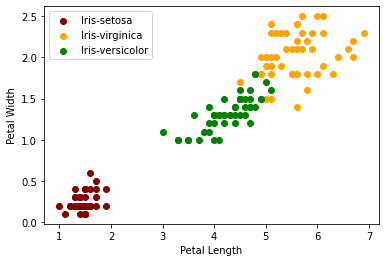

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthcm'], x['PetalWidthcm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

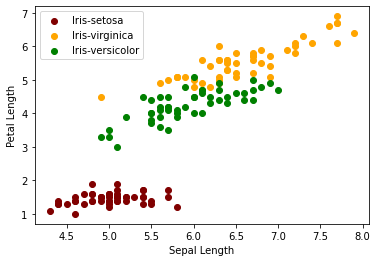

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthcm'], x['PetalLengthcm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

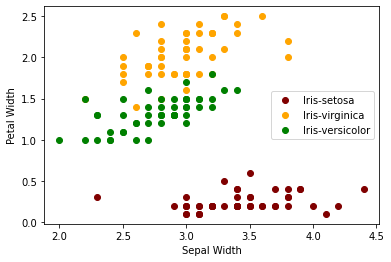

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthcm'], x['PetalWidthcm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

### Correlation Matrix 

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [16]:
df.corr()

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm
SepalLengthcm,1.000000,-0.109369,0.871754,0.817954
SepalWidthcm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthcm,0.871754,-0.420516,1.000000,0.962757
PetalWidthcm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

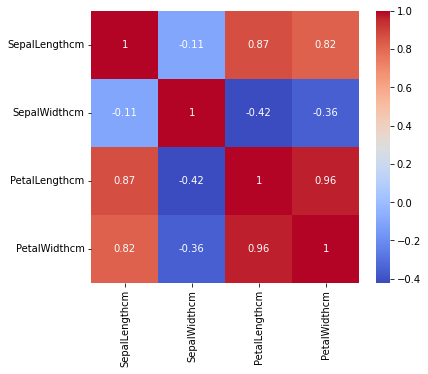

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

### Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['Species'] = le.fit_transform(df['Species'])
df.head(6)

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


### Model Training

In [20]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [26]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [27]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [29]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [30]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


# Thank You